In [ ]:
# Jonathan lopez

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

#set seaborn style and random seed
sns.set(style = "whitegrid")
np.random.seed(42)

Best k value: 4
Test accuracy with k = 4: 0.95


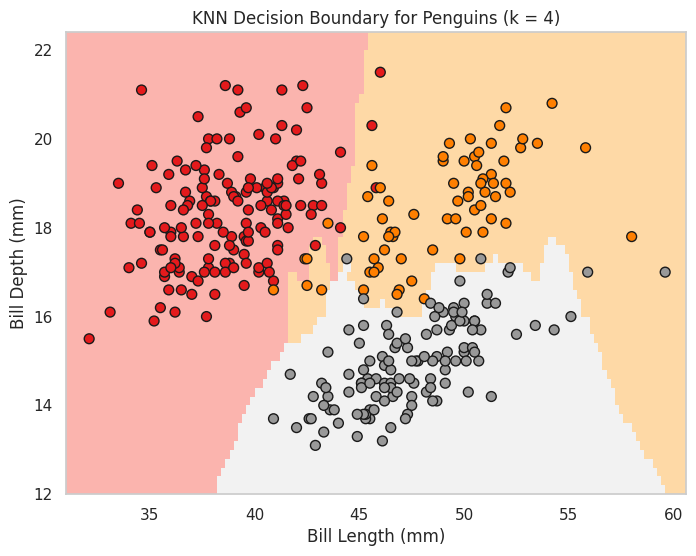

In [2]:

#KNN on penguins data

#load penguins data and drop missing values
penguins = sns.load_dataset("penguins")
penguins.dropna(subset = ["bill_length_mm", "bill_depth_mm", "species"], inplace = True)
penguins.head()

#use bill length and bill depth as features
X_penguins = penguins[["bill_length_mm", "bill_depth_mm"]].values
y_penguins = penguins["species"].values

#encode species into numeric values
le = LabelEncoder()
y_penguins_enc = le.fit_transform(y_penguins)

#train/test split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_penguins, y_penguins_enc, test_size = 0.3, random_state = 42)

#determine best k value for KNN using GridSearchCV
param_grid = {'n_neighbors': list(range(1,31))}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
knn_cv.fit(X_train_p, y_train_p)
best_k = knn_cv.best_params_['n_neighbors']
print(f"Best k value: {best_k}")


#retrain the KNN classifier using best k
knn_penguins = KNeighborsClassifier(n_neighbors = best_k)
knn_penguins.fit(X_train_p, y_train_p)
test_accuracy = knn_penguins.score(X_test_p, y_test_p)
print(f"Test accuracy with k = {best_k}: {test_accuracy:.2f}")

#plot mesh graph using best k
h = 0.2 #mesh step size
x_min, x_max = X_penguins[:, 0].min() - 1, X_penguins[:, 0].max() + 1
y_min, y_max = X_penguins[:, 1].min() - 1, X_penguins[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#predict over the mesh grid and reshape to match grid shape
Z = knn_penguins.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#create the plot
plt.figure(figsize = (8,6))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1, shading = 'auto')
plt.scatter(X_penguins[:, 0], X_penguins[:, 1], c = y_penguins_enc, cmap = plt.cm.Set1, edgecolor = "k", s = 50)
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title(f"KNN Decision Boundary for Penguins (k = {best_k})")
plt.show()

Linear Model R^2 Score: 0.120
  Underlying function: tip_percent = 19.897 + -0.270*total_bill + 0.598*size
Polynomial Degree 2 Model R^2 Score: 0.149
  Underlying function: tip_percent = 25.503 + -0.751*total_bill + 0.069*size + 0.008*total_bill^2 + 0.024*total_bill size + 0.006*size^2


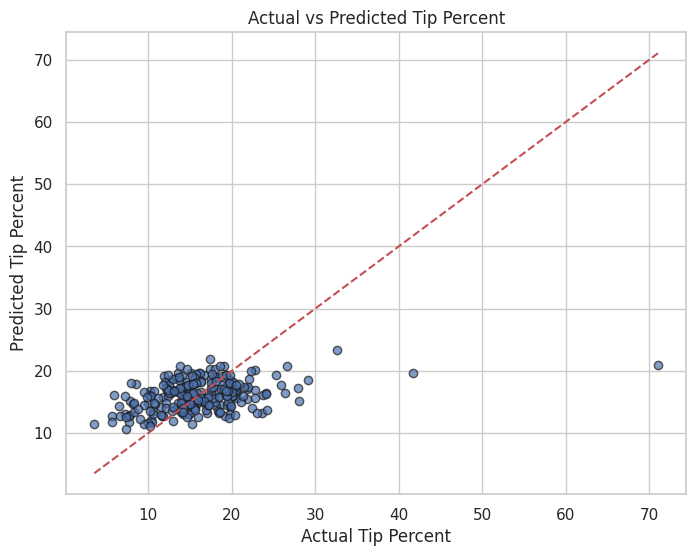

In [3]:
#polynomial/linear regression on Tips data

tips = sns.load_dataset("tips")
tips.head()

#create a new column: tip_percent (tip as percent of total)
tips["tip_percent"] = tips["tip"] / tips["total_bill"] * 100


#select features: total_bill and party size
X_tips = tips[["total_bill", "size"]].values
y_tips = tips["tip_percent"].values

#test with linear model of degree 1 and polynomial with degree 2
models = { "Linear": make_pipeline(PolynomialFeatures(degree = 1, include_bias = False), LinearRegression()),
          "Polynomial Degree 2": make_pipeline(PolynomialFeatures(degree = 2, include_bias = False), LinearRegression())}

#fit each model and indicate R^2 score/underlying function
for name, model in models.items():
    model.fit(X_tips, y_tips)
    score = model.score(X_tips, y_tips)
    print(f"{name} Model R^2 Score: {score:.3f}")

    #extract model details
    linreg = model.named_steps['linearregression']
    poly = model.named_steps.get('polynomialfeatures', None)
    if poly:
      feature_names = poly.get_feature_names_out(["total_bill", "size"])
      coeffs = linreg.coef_
      intercept = linreg.intercept_
      func = f"tip_percent = {intercept:.3f} + " + " + ".join([f"{coef:.3f}*{fname}" for coef, fname in zip(coeffs, feature_names)])
      print(f"  Underlying function: {func}")
    else:
      print(f"  Coefficients: {linreg.coef_}, Intercept: {linreg.intercept_}")

#use polynomial due to higher R^2
best_tips_model = models["Polynomial Degree 2"]

#plot actual vs predicted tip_percent
y_pred_tips = best_tips_model.predict(X_tips)
plt.figure(figsize = (8,6))
plt.scatter(y_tips, y_pred_tips, alpha = 0.7, edgecolor = "k")
plt.xlabel("Actual Tip Percent")
plt.ylabel("Predicted Tip Percent")
plt.title("Actual vs Predicted Tip Percent")
plt.plot([y_tips.min(), y_tips.max()], [y_tips.min(), y_tips.max()], 'r--')
plt.show()


hw1data.csv head:
   x         y
0  1  2.432942
1  2  3.318595
2  3  2.532240
3  4  1.486395
4  5  1.832151


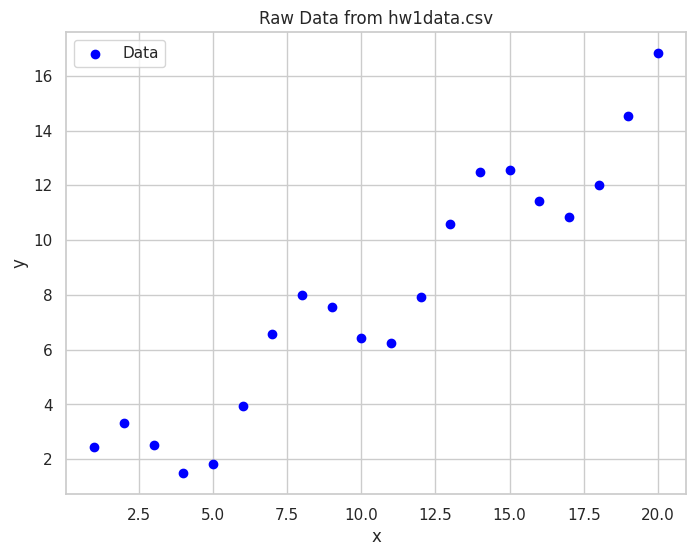

Linear regression on log-transformed y:
  Intercept: 0.702, Slope: 0.111
Underlying function: y = exp(intercept + slope * x)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


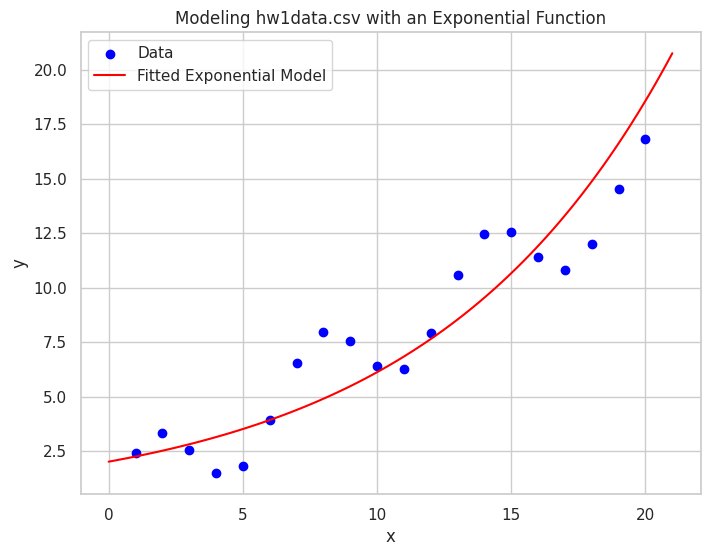

Prediction for x = 25: y = 32.356


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
#Hw1data.csv modeling with LinearRegression()

#load csv and assign column names x and y
hw1_data = pd.read_csv("hw1data.csv", header = None, names = ['x','y'])
print("hw1data.csv head:")
print(hw1_data.head())

# Plot the raw data.
plt.figure(figsize=(8, 6))
plt.scatter(hw1_data['x'], hw1_data['y'], color="blue", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data from hw1data.csv")
plt.legend()
plt.show()

# apply a log transform on y to linearize the relationship.
hw1_data['log_y'] = np.log(hw1_data['y'])

#fit a linear regression model on x versus log(y).
X_hw1 = hw1_data[['x']]
y_log = hw1_data['log_y']
lin_reg = LinearRegression()
lin_reg.fit(X_hw1, y_log)
print("Linear regression on log-transformed y:")
print(f"  Intercept: {lin_reg.intercept_:.3f}, Slope: {lin_reg.coef_[0]:.3f}")
print("Underlying function: y = exp(intercept + slope * x)")

# Plot the fitted model with the raw data.
x_range = np.linspace(hw1_data['x'].min() - 1, hw1_data['x'].max() + 1, 100)
pred_log = lin_reg.predict(x_range.reshape(-1, 1))
pred_y = np.exp(pred_log)  # Convert predictions back to the original scale.
plt.figure(figsize=(8, 6))
plt.scatter(hw1_data['x'], hw1_data['y'], color="blue", label="Data")
plt.plot(x_range, pred_y, color="red", label="Fitted Exponential Model")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Modeling hw1data.csv with an Exponential Function")
plt.legend()
plt.show()

# Check model predictions for x values outside the training range.
x_outside = np.array([[hw1_data['x'].max() + 5]])
pred_outside = np.exp(lin_reg.predict(x_outside))
print(f"Prediction for x = {x_outside[0][0]}: y = {pred_outside[0]:.3f}")


In [7]:
#diabetes with health indicators
diabetes = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()

#  Create a binary target and Set Diabetes_bin to 1 if Diabetes_012 equals 2 (diabetes), else 0.
diabetes['Diabetes_bin'] = (diabetes['Diabetes_012'] == 2).astype(int)

# Choose BMI as predictor and 'Diabetes_bin' as target.
X_diabetes = diabetes[['BMI']].values
y_diabetes = diabetes['Diabetes_bin'].values

# Fit a logistic regression model.
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_diabetes, y_diabetes)
print("Logistic Regression on Diabetes dataset:")
print(f"  Coefficient (w1): {log_reg.coef_[0][0]:.3f}, Intercept (w0): {log_reg.intercept_[0]:.3f}")

# Confirm log-odds difference and odds ratio per unit change.
# For two BMI values (30 and 31):
x1_val = 30
x2_val = 31
w0_d = log_reg.intercept_[0]
w1_d = log_reg.coef_[0][0]
logit1 = w0_d + w1_d * x1_val
logit2 = w0_d + w1_d * x2_val
print(f"Log-odds at BMI = {x1_val}: {logit1:.3f}")
print(f"Log-odds at BMI = {x2_val}: {logit2:.3f}")
print(f"Difference in log-odds: {logit2 - logit1:.3f} (should equal w1 = {w1_d:.3f})")
odds_ratio = np.exp(w1_d)
print(f"Odds ratio for a 1-unit increase in BMI: {odds_ratio:.3f}")

Logistic Regression on Diabetes dataset:
  Coefficient (w1): 0.078, Intercept (w0): -4.137
Log-odds at BMI = 30: -1.782
Log-odds at BMI = 31: -1.704
Difference in log-odds: 0.078 (should equal w1 = 0.078)
Odds ratio for a 1-unit increase in BMI: 1.082


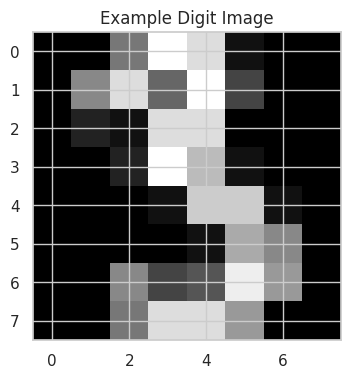

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Digits classification accuracy: 0.973
Misclassified sample index: 9
True label: 2, Predicted label: 3
Predicted probabilities: [[3.10387187e-14 4.07711963e-14 4.76045216e-01 5.18414101e-01
  2.03565411e-12 8.60719518e-09 3.02647776e-14 5.54067423e-03
  8.98301884e-11 3.57500141e-18]]


<Figure size 400x400 with 0 Axes>

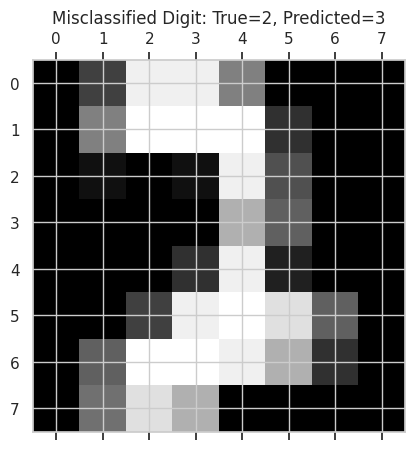

In [8]:
from sklearn.datasets import load_digits
#digits dataset and logisitc regression
digits = load_digits()
X_digits = digits.data   # Each row is a flattened 8x8 image.
y_digits = digits.target

# Visualize an example digit.
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[3], cmap = 'gray')
plt.title("Example Digit Image")
plt.show()

# Split the dataset into training and testing sets.
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits, y_digits, test_size=0.25, random_state=42
)

# Fit a logistic regression model to predict the numeral.
log_reg_digits = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')
log_reg_digits.fit(X_train_d, y_train_d)
acc_digits = log_reg_digits.score(X_test_d, y_test_d)
print(f"Digits classification accuracy: {acc_digits:.3f}")

# Predict on the test set.
y_pred_d = log_reg_digits.predict(X_test_d)

# Identify a misclassified instance.
misclassified_indices = np.where(y_pred_d != y_test_d)[0]
if len(misclassified_indices) > 0:
    idx = misclassified_indices[0]
    print(f"Misclassified sample index: {idx}")
    print(f"True label: {y_test_d[idx]}, Predicted label: {y_pred_d[idx]}")
    probas = log_reg_digits.predict_proba(X_test_d[idx].reshape(1, -1))
    print("Predicted probabilities:", probas)
    image = X_test_d[idx].reshape(8, 8)
    plt.figure(figsize=(4, 4))
    plt.gray()
    plt.matshow(image)
    plt.title(f"Misclassified Digit: True={y_test_d[idx]}, Predicted={y_pred_d[idx]}")
    plt.show()

else:
    print("No misclassified instances found.")
